In [8]:
# 데이터의 타당성을 높이기 위해 주성분 분석을 실시한다.
# 데이터의 벡터간 scale을 맞추기 위해 정규화를 진행하고 시작한다.

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt # scree plot 그리기 위해 설치
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') # warning 메시지 제거

from sklearn.preprocessing import StandardScaler# 데이터 표준화 위해 설치
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import PCA # PCA 하기 위해 설치

In [11]:
import matplotlib.pyplot as plt

# 한글 폰트 지정
# plt.rc('font', family='AppleGothic') # 맥
plt.rc('font', family='Malgun Gothic') # 윈도우

# 마이너스 값 깨지는 현상 해결
plt.rc('axes', unicode_minus=False)

# 레티나 디스플레이 설정
from IPython.display import set_matplotlib_formats

set_matplotlib_formats('retina')

In [3]:
# 사용할 파일 불러오기

tomato = pd.read_csv('/Users/chuu/Documents/GitHub/Learning_Spoons_Second_Project/data/full_data.csv')
tomato

,일시,도_num,연도,SO2,CO,O3,NO2,PM10,PM25,합계 일조시간(hr),품종명,도,마켓명,가격
0,2013-01-02,0,2013,0.005504,0.503030,0.030148,0.009233,35.018939,37.602906,8.300000,토마토(10kg),강원도,가락도매,29000.0
1,2013-01-02,1,2013,0.005632,0.417254,0.023083,0.018736,24.678419,37.602906,8.820000,토마토(10kg),경기도,가락도매,29000.0
2,2013-01-02,2,2013,0.006906,0.467460,0.024183,0.014894,24.450397,37.602906,6.133333,토마토(10kg),인천광역시,가락도매,29000.0
3,2013-01-02,3,2013,0.004950,0.403021,0.024425,0.021413,18.644792,37.602906,9.100000,토마토(10kg),서울특별시,가락도매,29000.0
4,2013-01-02,4,2013,0.005591,0.567593,0.025477,0.011117,44.833333,37.602906,7.980000,토마토(10kg),경상북도,북부도매,29000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22075,2018-12-31,10,2018,0.003241,0.502206,0.018193,0.023311,22.787681,12.066176,6.600000,토마토(10kg),울산광역시,엄궁도매,30000.0
22076,2018-12-31,11,2018,0.003150,0.475868,0.017313,0.022639,29.648866,19.518839,5.921429,토마토(10kg),경상남도,엄궁도매,30000.0
22077,2018-12-31,12,2018,0.003204,0.605093,0.015468,0.027125,34.759259,22.728704,9.200000,토마토(10kg),광주광역시,각화도매,31000.0
22078,2018-12-31,13,2018,0.004119,0.373418,0.014718,0.027532,28.525591,15.960829,5.700000,토마토(10kg),부산광역시,엄궁도매,30000.0


In [4]:
# 분석 전 테스트 데이터로 쓰일 2018 데이터 제외하고 시작
tomato1317 = tomato[tomato['일시'].str.contains('2013|2014|2015|2016|2017')]
tomato1317.tail()

,일시,도_num,연도,SO2,CO,O3,NO2,PM10,PM25,합계 일조시간(hr),품종명,도,마켓명,가격
18415,2017-12-29,10,2017,0.004550,0.930384,0.023088,0.033774,81.213251,41.930678,8.300000,토마토(10kg),울산광역시,엄궁도매,21000.0
18416,2017-12-29,11,2017,0.004742,0.748507,0.021643,0.028905,81.940972,39.022832,6.742857,토마토(10kg),경상남도,엄궁도매,21000.0
18417,2017-12-29,12,2017,0.003583,0.828460,0.008503,0.040649,83.175926,59.228704,0.100000,토마토(10kg),광주광역시,각화도매,22000.0
18418,2017-12-29,13,2017,0.004547,0.500735,0.020633,0.032862,88.154762,60.079365,8.300000,토마토(10kg),부산광역시,엄궁도매,21000.0
18419,2017-12-29,14,2017,0.004979,0.731250,0.024893,0.021241,60.396610,35.690363,3.835714,토마토(10kg),전라남도,각화도매,22000.0


In [5]:
# 분석에 사용할 독립변수 컬럼 따로 빼기
tom_f = tomato1317.iloc[:,3:10]
tom_f

,SO2,CO,O3,NO2,PM10,PM25,합계 일조시간(hr)
0,0.005504,0.503030,0.030148,0.009233,35.018939,37.602906,8.300000
1,0.005632,0.417254,0.023083,0.018736,24.678419,37.602906,8.820000
2,0.006906,0.467460,0.024183,0.014894,24.450397,37.602906,6.133333
3,0.004950,0.403021,0.024425,0.021413,18.644792,37.602906,9.100000
4,0.005591,0.567593,0.025477,0.011117,44.833333,37.602906,7.980000
...,...,...,...,...,...,...,...
18415,0.004550,0.930384,0.023088,0.033774,81.213251,41.930678,8.300000
18416,0.004742,0.748507,0.021643,0.028905,81.940972,39.022832,6.742857
18417,0.003583,0.828460,0.008503,0.040649,83.175926,59.228704,0.100000
18418,0.004547,0.500735,0.020633,0.032862,88.154762,60.079365,8.300000


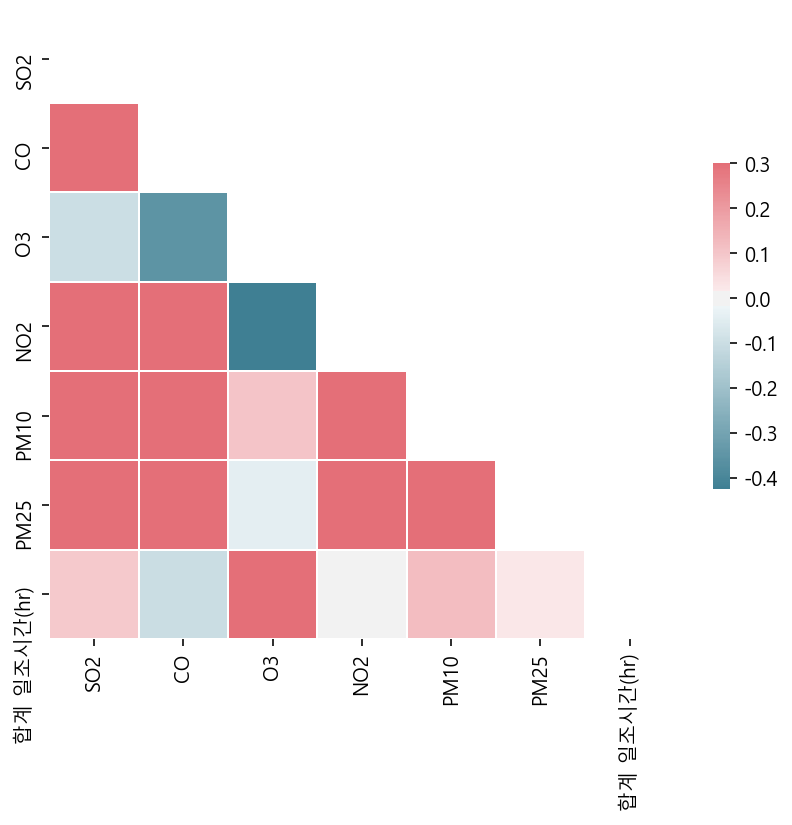

In [20]:
# 변수끼리의 상관관계 계산
corr = tom_f.corr()

# 상관관계 계수를 히트맵 그래프로 나타낸다.
plt.figure(figsize=(7,6))
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [6]:
# 데이터의 스케일을 맞추기 위해 표준화 한다.

# tomato_std = StandardScaler().fit_transform(tom_f)
tomato_std = Normalizer().fit_transform(tom_f)
tomato_std = pd.DataFrame(tomato_std)
tomato_std.columns=['SO2','CO','O3','NO2','PM10','PM25','합계 일조시간(hr)']
tomato_std

,SO2,CO,O3,NO2,PM10,PM25,합계 일조시간(hr)
0,0.000106,0.009664,0.000579,0.000177,0.672764,0.722405,0.159455
1,0.000123,0.009103,0.000504,0.000409,0.538403,0.820373,0.192424
2,0.000153,0.010325,0.000534,0.000329,0.540067,0.830583,0.135475
3,0.000115,0.009384,0.000569,0.000499,0.434119,0.875533,0.211881
4,0.000095,0.009611,0.000431,0.000188,0.759123,0.636697,0.135118
...,...,...,...,...,...,...,...
18415,0.000050,0.010137,0.000252,0.000368,0.884871,0.456862,0.090434
18416,0.000052,0.008224,0.000238,0.000318,0.900334,0.428767,0.074088
18417,0.000035,0.008113,0.000083,0.000398,0.814551,0.580034,0.000979
18418,0.000042,0.004680,0.000193,0.000307,0.823843,0.561466,0.077567


In [28]:
# 공분산 행렬 구하기
tom_cov = np.cov(tomato_std.T)
tom_cov

array([[ 1.53185464e-09,  6.09675941e-08,  2.13091809e-09,
         3.16810961e-09, -5.42307851e-07,  7.12103387e-07,
         4.99096847e-07],
       [ 6.09675941e-08,  1.03466860e-05,  1.66816651e-07,
         3.54923113e-07, -8.14750877e-05,  1.24745207e-04,
        -3.71856282e-07],
       [ 2.13091809e-09,  1.66816651e-07,  9.20585001e-08,
        -6.51829081e-09, -6.41596176e-06,  6.59998741e-06,
         1.08633385e-05],
       [ 3.16810961e-09,  3.54923113e-07, -6.51829081e-09,
         3.51966572e-08, -1.94841713e-06,  2.97544241e-06,
         5.69951043e-07],
       [-5.42307851e-07, -8.14750877e-05, -6.41596176e-06,
        -1.94841713e-06,  7.76016577e-03, -1.06394913e-02,
        -1.19269033e-03],
       [ 7.12103387e-07,  1.24745207e-04,  6.59998741e-06,
         2.97544241e-06, -1.06394913e-02,  1.64468985e-02,
        -3.03491345e-04],
       [ 4.99096847e-07, -3.71856282e-07,  1.08633385e-05,
         5.69951043e-07, -1.19269033e-03, -3.03491345e-04,
         8.8692785

In [29]:
# 고유값과 고유벡터 계산 (고유분해)
eig_vals, eig_vecs= np.linalg.eig(tom_cov)

In [30]:
# 고유값 확인
eig_vals

array([2.36080027e-02, 9.01745057e-03, 4.51854051e-04, 9.41276639e-06,
       1.07481614e-09, 2.00285606e-08, 7.70097464e-08])

In [31]:
# 고유벡터 확인
eig_vecs

array([[-3.84468493e-05,  5.28257042e-05, -3.02209027e-05,
         5.90043485e-03,  9.98184938e-01,  5.98140149e-02,
        -3.78059423e-03],
       [-6.31025748e-03, -5.34522845e-04, -3.41199130e-03,
         9.99255955e-01, -3.64447415e-03, -3.75096363e-02,
         3.94144387e-03],
       [-3.96550400e-04,  1.18965901e-03,  3.71123139e-04,
         1.21746198e-02, -1.71627744e-02,  2.23621979e-01,
        -9.74447904e-01],
       [-1.51351798e-04,  5.08596720e-05, -2.47917819e-04,
         3.53932700e-02, -5.76106369e-02,  9.72115428e-01,
         2.24543623e-01],
       [ 5.58640351e-01, -9.77013710e-02, -8.23634952e-01,
         6.66032145e-04, -5.10687795e-06,  7.65621689e-06,
        -6.50134217e-04],
       [-8.28908440e-01, -9.94565343e-02, -5.50425140e-01,
        -7.16629650e-03, -2.16725922e-06,  1.49888928e-05,
        -7.97875268e-05],
       [-2.81381529e-02,  9.90232868e-01, -1.36549590e-01,
        -1.31416618e-04, -3.23605363e-05, -3.39764609e-04,
         1.0893322

In [32]:
# 주성분의 고유값 비율 확인
eig_vals_sum = np.sum(eig_vals)
for eig_val in eig_vals:
    print (str(eig_val/eig_vals_sum))

0.7135168624317092
0.27253906693611557
0.013656618407574189
0.00028448690099542115
3.2484723311730336e-08
6.053335344184334e-07
2.3275053478455974e-06


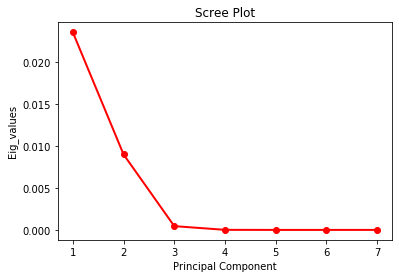

In [33]:
# 위 데이터를 이용해 scree plot 그려서 고유값 확인. 주성분 개수를 정할 때 한 눈에 볼 수 있어서 좋다.
sing_vals = np.arange(len(eig_vals))+1
plt.plot(sing_vals, eig_vals, "ro-", linewidth=2)
plt.title("Scree Plot")
plt.xlabel("Principal Component")
plt.ylabel("Eig_values")
plt.show()

In [35]:
# 주성분의 개수를 4개로 하여 주성분 분석
pca = PCA(n_components = 2)
pca

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [36]:
# 각 주성분 데이터들을 찾아서 array로 만든다.
pca_values = pca.fit_transform(tomato_std)
pca_values

array([[ 0.28420662,  0.01872253],
       [ 0.4413965 ,  0.05475336],
       [ 0.44733505, -0.00281807],
       ...,
       [ 0.0825159 , -0.13789793],
       [ 0.06406847, -0.06111754],
       [-0.00086325, -0.08204215]])

In [37]:
# 고유값의 누적 설명력 확인. 80% 넘는것을 확인할 수 있다.
sum(pca.explained_variance_ratio_)

0.9860559293678253

In [39]:
# 위에서 구한 주성분으로 이루어진 데이터 프레임 생성
pcadf = pd.DataFrame(data=pca_values, columns = ['PC1', 'PC2'])
pcadf

,PC1,PC2
0,0.284207,0.018723
1,0.441396,0.054753
2,0.447335,-0.002818
3,0.545926,0.078723
4,0.164233,-0.005290
...,...,...
18415,-0.056335,-0.043938
18416,-0.088734,-0.058840
18417,0.082516,-0.137898
18418,0.064068,-0.061118


In [40]:
# 처음 데이터의 변수부분을 빼고 주성분 분석으로 구한 데이터 프레임과 합친다.
# 처음 데이터의 변수부분을 제외한 좌 우 데이터를 만든다.
tom_1 = tomato1317.iloc[:,0:3]
tom_2 = tomato1317.iloc[:,-4:]

In [41]:
# 데이터 병합 후 확인
tom_fin = pd.concat([tom_1,pcadf,tom_2],axis=1)
tom_fin

,일시,도_num,연도,PC1,PC2,품종명,도,마켓명,가격
0,2013-01-02,0,2013,0.284207,0.018723,토마토(10kg),강원도,가락도매,29000.0
1,2013-01-02,1,2013,0.441396,0.054753,토마토(10kg),경기도,가락도매,29000.0
2,2013-01-02,2,2013,0.447335,-0.002818,토마토(10kg),인천광역시,가락도매,29000.0
3,2013-01-02,3,2013,0.545926,0.078723,토마토(10kg),서울특별시,가락도매,29000.0
4,2013-01-02,4,2013,0.164233,-0.005290,토마토(10kg),경상북도,북부도매,29000.0
...,...,...,...,...,...,...,...,...,...
18415,2017-12-29,10,2017,-0.056335,-0.043938,토마토(10kg),울산광역시,엄궁도매,21000.0
18416,2017-12-29,11,2017,-0.088734,-0.058840,토마토(10kg),경상남도,엄궁도매,21000.0
18417,2017-12-29,12,2017,0.082516,-0.137898,토마토(10kg),광주광역시,각화도매,22000.0
18418,2017-12-29,13,2017,0.064068,-0.061118,토마토(10kg),부산광역시,엄궁도매,21000.0


In [44]:
# 데이터 저장
tom_fin.to_csv('tom_fin.csv',encoding = 'cp949', index=False)

In [45]:
# 저장된 데이터 확인
pd.read_csv('tom_fin.csv', encoding = 'cp949')

,일시,도_num,연도,PC1,PC2,품종명,도,마켓명,가격
0,2013-01-02,0,2013,0.284207,0.018723,토마토(10kg),강원도,가락도매,29000.0
1,2013-01-02,1,2013,0.441396,0.054753,토마토(10kg),경기도,가락도매,29000.0
2,2013-01-02,2,2013,0.447335,-0.002818,토마토(10kg),인천광역시,가락도매,29000.0
3,2013-01-02,3,2013,0.545926,0.078723,토마토(10kg),서울특별시,가락도매,29000.0
4,2013-01-02,4,2013,0.164233,-0.005290,토마토(10kg),경상북도,북부도매,29000.0
...,...,...,...,...,...,...,...,...,...
18415,2017-12-29,10,2017,-0.056335,-0.043938,토마토(10kg),울산광역시,엄궁도매,21000.0
18416,2017-12-29,11,2017,-0.088734,-0.058840,토마토(10kg),경상남도,엄궁도매,21000.0
18417,2017-12-29,12,2017,0.082516,-0.137898,토마토(10kg),광주광역시,각화도매,22000.0
18418,2017-12-29,13,2017,0.064068,-0.061118,토마토(10kg),부산광역시,엄궁도매,21000.0
